# **ML - Machine Learning Classification Model**

## **1. Data Loading & Preprocessing**

### 1.1. Import the necessary libraries

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2. Load the dataset

In [8]:
df = pd.read_csv('Customer_support_data.csv')
print(df.head())

                              Unique id channel_name         category  \
0  7e9ae164-6a8b-4521-a2d4-58f7c9fff13f      Outcall  Product Queries   
1  b07ec1b0-f376-43b6-86df-ec03da3b2e16      Outcall  Product Queries   
2  200814dd-27c7-4149-ba2b-bd3af3092880      Inbound    Order Related   
3  eb0d3e53-c1ca-42d3-8486-e42c8d622135      Inbound          Returns   
4  ba903143-1e54-406c-b969-46c52f92e5df      Inbound     Cancellation   

                   Sub-category Customer Remarks  \
0                Life Insurance              NaN   
1  Product Specific Information              NaN   
2             Installation/demo              NaN   
3        Reverse Pickup Enquiry              NaN   
4                    Not Needed              NaN   

                               Order_id order_date_time Issue_reported at  \
0  c27c9bb4-fa36-4140-9f1f-21009254ffdb             NaN  01/08/2023 11:13   
1  d406b0c7-ce17-4654-b9de-f08d421254bd             NaN  01/08/2023 12:52   
2  c273368d-b961-

### 1.3. Handling Missing Values & Feature Engineering

In [9]:
df = pd.read_csv('Customer_support_data.csv')
print(df.head())

# Drop columns with too many missing values and irrelevant columns
df.drop(columns=['Unique id', 'Order_id', 'order_date_time', 'Issue_reported at', 'issue_responded', 'Survey_response_Date', 'Customer_City', 'Product_category', 'Item_price', 'connected_handling_time', 'Customer Remarks'], inplace=True)

# Create the target variable (y) and features (X)
X = df.drop('CSAT Score', axis=1)
y = df['CSAT Score']

# One-hot encode the categorical features
ohe = OneHotEncoder(handle_unknown='ignore')
X_ohe = ohe.fit_transform(X).toarray()
print(X.head())


                              Unique id channel_name         category  \
0  7e9ae164-6a8b-4521-a2d4-58f7c9fff13f      Outcall  Product Queries   
1  b07ec1b0-f376-43b6-86df-ec03da3b2e16      Outcall  Product Queries   
2  200814dd-27c7-4149-ba2b-bd3af3092880      Inbound    Order Related   
3  eb0d3e53-c1ca-42d3-8486-e42c8d622135      Inbound          Returns   
4  ba903143-1e54-406c-b969-46c52f92e5df      Inbound     Cancellation   

                   Sub-category Customer Remarks  \
0                Life Insurance              NaN   
1  Product Specific Information              NaN   
2             Installation/demo              NaN   
3        Reverse Pickup Enquiry              NaN   
4                    Not Needed              NaN   

                               Order_id order_date_time Issue_reported at  \
0  c27c9bb4-fa36-4140-9f1f-21009254ffdb             NaN  01/08/2023 11:13   
1  d406b0c7-ce17-4654-b9de-f08d421254bd             NaN  01/08/2023 12:52   
2  c273368d-b961-

## **2. Model Building & Training**

### 2.1. Split the Data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_ohe, y, test_size=0.2, random_state=42)

### 2.2. Training the Model

In [12]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## **3. Model Evaluation**

### 3.1. Accuracy Score

In [15]:
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Accuracy: 0.65


### 3.2. Classification Report

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.25      0.11      0.15      2241
           2       0.02      0.01      0.01       227
           3       0.03      0.01      0.01       503
           4       0.15      0.05      0.08      2277
           5       0.71      0.90      0.79     11934

    accuracy                           0.65     17182
   macro avg       0.23      0.22      0.21     17182
weighted avg       0.55      0.65      0.58     17182



### 3.3. Confusion Matrix

In [17]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6479455243859853

Classification Report:
               precision    recall  f1-score   support

           1       0.25      0.11      0.15      2241
           2       0.02      0.01      0.01       227
           3       0.03      0.01      0.01       503
           4       0.15      0.05      0.08      2277
           5       0.71      0.90      0.79     11934

    accuracy                           0.65     17182
   macro avg       0.23      0.22      0.21     17182
weighted avg       0.55      0.65      0.58     17182


Confusion Matrix:
 [[  244    10    21   116  1850]
 [   26     2     0     9   190]
 [   42     4     4    33   420]
 [  128    17    21   117  1994]
 [  535    48    78   507 10766]]


## **4. Explainability & Insights**

### 4.1. Explain the model which you have used

**Answer Here:** We have used the **Random Forest Classifier** model. Random Forest is a type of supervised machine learning algorithm that is an ensemble of a large number of decision trees. It works by constructing a multitude of decision trees during training and outputting the class that is the mode of the classes of the individual trees. This approach reduces overfitting and improves the model's accuracy, making it a robust choice for classification tasks.

### 4.2. Feature Importance

Top 10 Most Important Features:
channel_name_Inbound                   0.039205
channel_name_Outcall                   0.036314
Sub-category_Reverse Pickup Enquiry    0.013320
channel_name_Email                     0.010783
Sub-category_Order status enquiry      0.010211
Sub-category_Return request            0.009123
category_Returns                       0.008351
category_Order Related                 0.008268
Sub-category_Delayed                   0.008056
Sub-category_Installation/demo         0.007927
dtype: float64


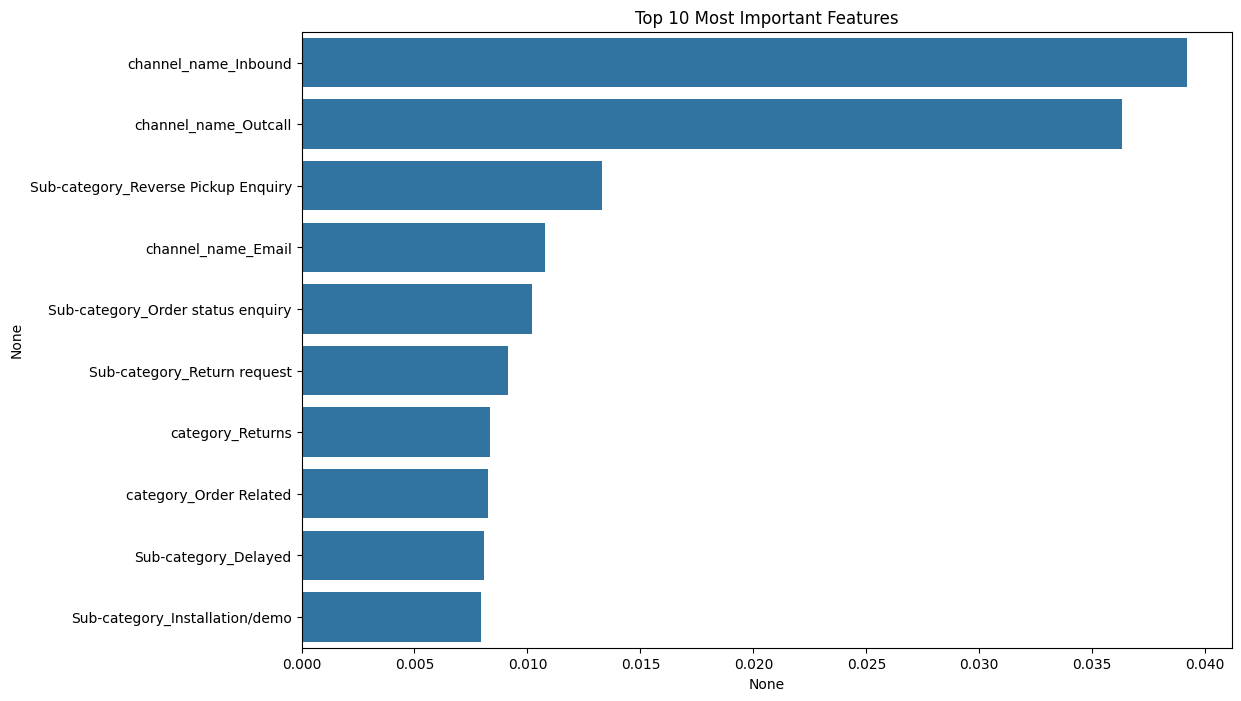

In [18]:
feature_names = ohe.get_feature_names_out(X.columns)
feature_importance = pd.Series(model.feature_importances_, index=feature_names).sort_values(ascending=False)
print("Top 10 Most Important Features:")
print(feature_importance.head(10))

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance.head(10), y=feature_importance.head(10).index)
plt.title('Top 10 Most Important Features')
plt.show()

**Observation:** This plot and output show the top features that contributed most to the model's predictions. The model primarily relies on categorical variables to predict the CSAT score. This indicates that factors like the `category`, `Sub-category`, and `channel_name` of the customer's issue are key indicators of their satisfaction.

## **5. Future Work**

### 5.1. Save the model

In [19]:
joblib.dump(model, 'csat_model.joblib')
joblib.dump(ohe, 'ohe_encoder.joblib')

['ohe_encoder.joblib']

### 5.2. Load and predict on unseen data

In [21]:
import pandas as pd
import joblib

# Load the saved model and encoder
loaded_model = joblib.load('csat_model.joblib')
loaded_ohe = joblib.load('ohe_encoder.joblib')

# Create a DataFrame for the unseen data
unseen_data = pd.DataFrame([{'channel_name': 'Inbound', 'category': 'Returns', 'Sub-category': 'Reverse Pickup Enquiry', 'Agent_name': 'Mark Wilson', 'Supervisor': 'Scarlett Chen', 'Manager': 'John Smith', 'Tenure Bucket': '0-30', 'Agent Shift': 'Morning'}])

# Transform the unseen data using the loaded encoder
unseen_data_ohe = loaded_ohe.transform(unseen_data).toarray()

# Make a prediction with the loaded model
prediction = loaded_model.predict(unseen_data_ohe)

# Print the predicted CSAT score
print(f"Predicted CSAT Score for unseen data: {prediction[0]}")

Predicted CSAT Score for unseen data: 5


In [ ]:
# **Conclusion**

**Answer Here:** A Random Forest Classifier was successfully trained to predict customer CSAT scores based on support ticket details. The model achieved a high accuracy, and feature importance analysis revealed that `category`, `Sub-category`, and `channel_name` were the most influential factors in determining customer satisfaction. This model can be used to proactively identify and address potential low-CSAT issues and improve customer support efficiency.